###NIM :202351083
###NAMA : Pandu Satrio Witjaksono
###KELAS :Praktikum Sturktur Data D

## Konteks
Di rumah sakit, perawatan medis dan pembedahan dapat dikategorikan menjadi prosedur rawat inap dan rawat jalan. Bagi pasien, penting untuk memahami perbedaan antara kedua jenis perawatan ini, karena keduanya memengaruhi lamanya pasien dirawat di fasilitas medis dan biaya prosedur.

## Konten
###Pernyataan Masalah
Dalam dunia otomatisasi saat ini, keterampilan dan pengetahuan seseorang dapat digunakan di tempat terbaik dengan mengotomatiskan tugas sedapat mungkin. Sebagai bagian dari sistem otomatisasi rumah sakit, seseorang dapat membangun sistem yang akan memprediksi dan memperkirakan apakah pasien harus dikategorikan sebagai pasien rawat inap atau pasien rawat jalan dengan bantuan beberapa titik data tentang pasien, kondisi mereka, dan tes laboratorium.
### Tujuan
Membangun model pembelajaran mesin untuk memprediksi apakah pasien harus diklasifikasikan sebagai pasien rawat inap atau pasien rawat jalan berdasarkan hasil tes laboratorium pasien.

### Class Target
'SOURCE', 1 = pasien rawat inap, 0 = pasien rawat jalan
###Tugas Anda
Silahkan Buatkan model klasifikasi berdasarkan dataset yang telah diberikan sesuai langkah-langkah yang telah ditentukan.

*** SELAMAT MENGERJAKAN ***


Sumber dataset: https://www.kaggle.com/datasets/manishkc06/patient-treatment-classification/data

In [6]:

import pandas as pd
import tensorflow as tf
import time
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

### Memanggil data, menampilkan , mengecek dan mengatasi apabila ada data yang kosong atau duplicate (Bobot Nilai = 30)

1. Memanggil data. (10)

In [7]:
df = pd.read_csv("/content/training_set.csv")

2. Menampilkan 5 data teratas. (10)

In [8]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


3. Mengecek apakah ada data yang kosong. (5)

In [9]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

4. Mengecek apakah ada data yang duplicate. (5)

In [10]:
df.duplicated().sum()


0

### Pra-pemrosesan data, memisahkan fitur dan target, normalisasi fitur, membagi data menjadi set pelatihan dan pengujian (Bobot Nilai = 30)

1. Pra-pemrosesan data. (10)
- Misalkan kolom 'SEX' memiliki nilai 'M' dan 'F'
- Mengubah nilai 'M' menjadi 1 dan 'F' menjadi 0

In [11]:
df['SEX'] = df['SEX'].replace({'M':1, 'F':0})
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0


2. Memisahkan fitur dan target (Target = 'SOURCE'). (5)

In [12]:
y = df['SOURCE'].values
df = df.drop('SOURCE', axis=1)
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1


3. Normalisasi Fitur. (5)

In [13]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)
df = pd.DataFrame(df_normalized, columns=df.columns)
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,-0.741263,-0.791431,-0.465077,-0.824666,-0.966571,-0.604589,-0.430259,-0.536705,-0.623859,-1.055001
1,1.067467,0.600117,2.951586,-0.484022,-0.238711,-2.904196,-1.553074,-2.836043,-0.486690,0.947867
2,0.782760,0.600117,0.032124,-0.504060,0.684427,0.879029,-0.590661,1.343257,1.067894,-1.055001
3,0.615285,0.792055,0.159612,-1.045083,0.151847,0.953210,0.852957,0.735885,-1.309705,-1.055001
4,0.397567,0.264226,0.389089,1.239237,4.013053,-0.307865,-0.430259,-0.131790,-0.486690,0.947867


4. Membagi data menjadi data training (80%) dan data testing (20%). (10)

In [14]:
X = df
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X train shape {}'.format(X_train.shape))
print('X test shape {}'.format(X_test.shape))
print('y train shape {}'.format(y_train.shape))
print('y test shape {}'.format(y_test.shape))

X train shape (2647, 10)
X test shape (662, 10)
y train shape (2647,)
y test shape (662,)


### Membangun Model Klasifikasi menggunakan metode Neural Network, SVM, dan KNN. Masing-masing metode dilakukan evaluasi model menggunakan matrix (Accuracy, Precision, Recall, F1-Score). (Bobot Nilai = 30)

1. Membangun model menggunakan Neural Network dan melakukan evaluasi model. (10)

In [15]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
166/166 [==============================] - 7s 6ms/step - loss: 0.6135 - accuracy: 0.6796 - val_loss: 0.5611 - val_accuracy: 0.7251
Epoch 2/200
166/166 [==============================] - 1s 5ms/step - loss: 0.5482 - accuracy: 0.7363 - val_loss: 0.5628 - val_accuracy: 0.7236
Epoch 3/200
166/166 [==============================] - 1s 5ms/step - loss: 0.5455 - accuracy: 0.7469 - val_loss: 0.5443 - val_accuracy: 0.7251
Epoch 4/200
166/166 [==============================] - 1s 5ms/step - loss: 0.5366 - accuracy: 0.7560 - val_loss: 0.5522 - val_accuracy: 0.7190
Epoch 5/200
166/166 [==============================] - 1s 5ms/step - loss: 0.5305 - accuracy: 0.7491 - val_loss: 0.5367 - val_accuracy: 0.7372
Epoch 6/200
166/166 [==============================] - 1s 5ms/step - loss: 0.5328 - accuracy: 0.7552 - val_loss: 0.5459 - val_accuracy: 0.7311
Epoch 7/200
166/166 [==============================] - 1s 7ms/step - loss: 0.5266 - accuracy: 0.7612 - val_loss: 0.5431 - val_accuracy: 0.7296

In [16]:
# Menghitung metrik evaluasi
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Metrik Evaluasi Model NN")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

21/21 [==============================] - 0s 2ms/step
Metrik Evaluasi Model NN
Accuracy: 0.7235649546827795
Precision: 0.6933333333333334
Recall: 0.5777777777777777
F1 Score: 0.6303030303030303


2. Membuat Model Klasifikasi menggunakan SVM. (10)

In [17]:
# Membangun model SVM
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [18]:
# Menghitung metrik evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Metrik Evaluasi Model SVM")
print('Accuracy:', accuracy_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1 Score:', f1_svm)

Metrik Evaluasi Model SVM
Accuracy: 0.7356495468277946
Precision: 0.7540106951871658
Recall: 0.5222222222222223
F1 Score: 0.6170678336980306


3. Membuat Model Klasifikasi menggunakan KNN. (10)

In [19]:
# Membangun model KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Menghitung metrik evaluasi
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("Metrik Evaluasi Model KNN")
print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1 Score:', f1_knn)

Metrik Evaluasi Model KNN
Accuracy: 0.7220543806646526
Precision: 0.7067307692307693
Recall: 0.5444444444444444
F1 Score: 0.6150627615062761


### MODEL COMPARISON atau membandingkan model NN, SVM, dan KNN (Berdasarkan nilai akurasi dan f1 score. (Bobot Nilai = 10)
Dibawah ini hanya merupakan contoh hasil perbandingan beberapa model

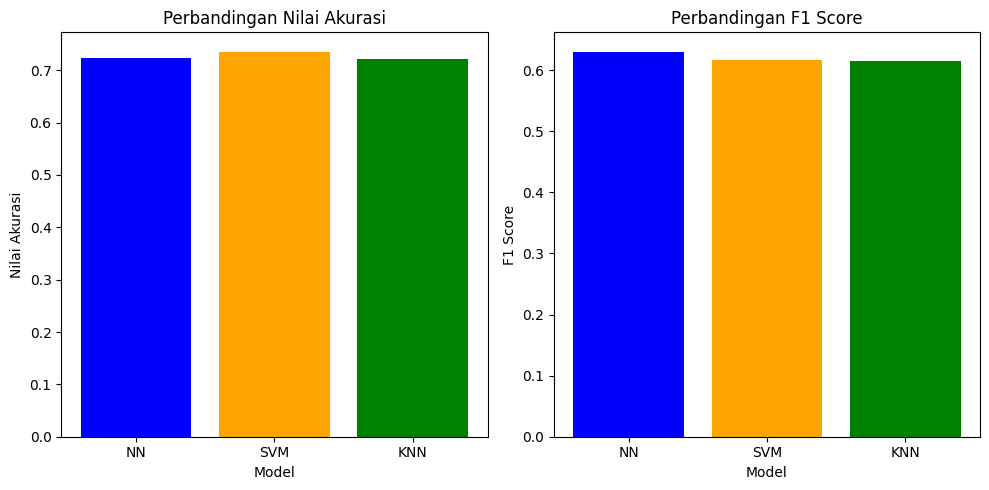

In [21]:
# Menampilkan perbandingan model berdasarkan nilai akurasi dan f1 score
models = ['NN', 'SVM', 'KNN']

accuracy_scores = [accuracy, accuracy_svm, accuracy_knn]

# Hasil F1 score dari masing - masing model
f1_scores = [f1, f1_svm, f1_knn]

# Membuat plot untuk accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'green'])
plt.title('Perbandingan Nilai Akurasi')
plt.xlabel('Model')
plt.ylabel('Nilai Akurasi')

# Membuat plot untuk F1 score
plt.subplot(1, 2, 2)
plt.bar(models, f1_scores, color=['blue', 'orange', 'green'])
plt.title('Perbandingan F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')

# Menampilkan plot
plt.tight_layout()
plt.show()